# Importing libraries

In [92]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Data Preprocessing

In [93]:
data = pd.read_csv("Music/tested_titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [94]:
data.shape

(418, 12)

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [96]:
data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [97]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Data cleaning by coping with missing values

In [98]:
data = data.drop(columns = "Cabin", axis = 1)

In [99]:
data['Age'].fillna(data['Age'].mean(), inplace=True)

In [100]:
print(data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [124]:
print(data['Embarked'].mode())

0    0
Name: Embarked, dtype: int64


In [101]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [128]:
print(data['Fare'].mode())

0    7.75
Name: Fare, dtype: float64


In [129]:
data['Fare'].fillna(data['Fare'].mode()[0], inplace=True)

In [130]:
# rechecking for confirmation
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [131]:
#Now lets check how many people survived or not?
data['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

# Data Visualization

C:\Users\Orange Computers\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

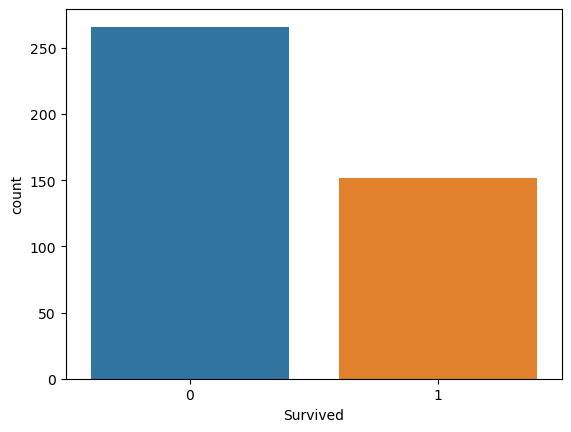

In [132]:
#Now making a bar chart for survided passengers using seaborn library
sns.countplot('Survived', data=data)

<AxesSubplot:ylabel='Frequency'>

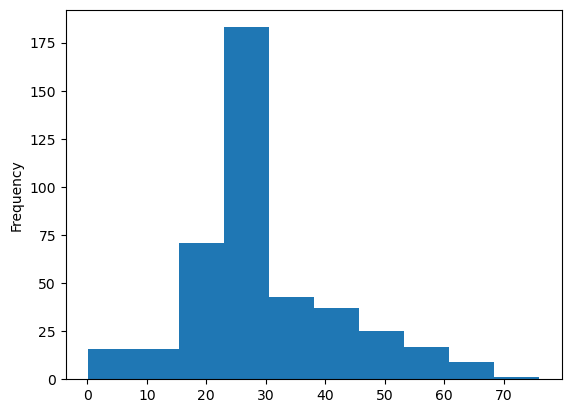

In [158]:
data["Age"].plot.hist()

<AxesSubplot:xlabel='Survived', ylabel='count'>

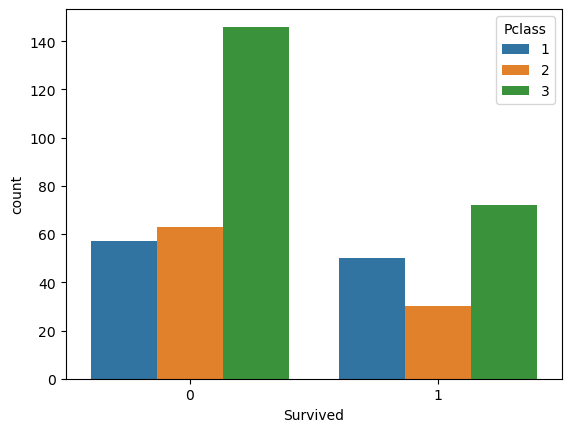

In [105]:
# Now compared survided passengers with respect to some other columns
sns.countplot(x = data['Survived'], hue = data["Pclass"])


In [133]:
data["Sex"]

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Sex, Length: 418, dtype: int64

C:\Users\Orange Computers\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

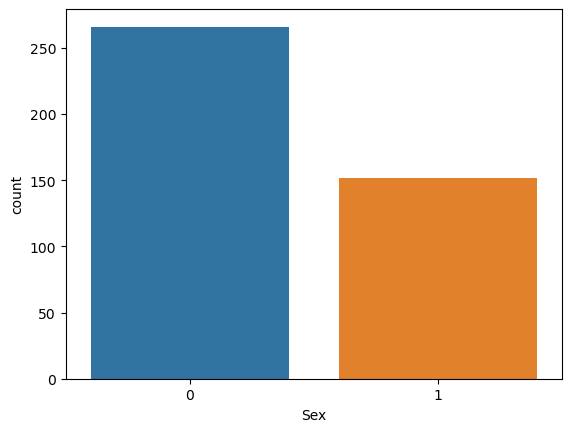

In [134]:
# Visualize the gender
sns.countplot('Sex', data=data)

In [135]:
data['Sex'].value_counts()

0    266
1    152
Name: Sex, dtype: int64

C:\Users\Orange Computers\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

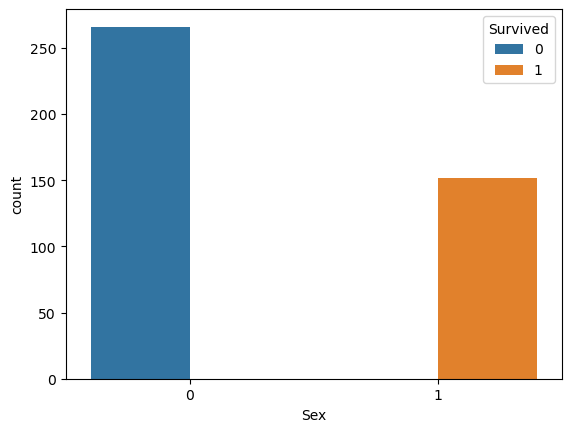

In [136]:
# Now lets see what was the ratio of survived passengers with respect to sex/gender

sns.countplot('Sex', hue='Survived', data=data)

In [137]:
data.groupby("Sex")[["Survived"]].mean()

,Survived
Sex,
0,0.0
1,1.0


# Converting categoricaal data into numeric befor training the model

In [138]:
data['Sex'].value_counts()

0    266
1    152
Name: Sex, dtype: int64

In [139]:
data['Embarked'].value_counts()

0    270
1    102
2     46
Name: Embarked, dtype: int64

In [140]:
# We will also convert categorical columns into numeric ones
data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


In [141]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0
5,897,0,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,0
6,898,1,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,2
7,899,0,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,0
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,1
9,901,0,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.1500,0


In [142]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [143]:
x = data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
y = data['Survived']


In [144]:
print(x)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         2
1         3    1  47.00000      1      0    7.0000         0
2         2    0  62.00000      0      0    9.6875         2
3         3    0  27.00000      0      0    8.6625         0
4         3    1  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         0
414       1    1  39.00000      0      0  108.9000         1
415       3    0  38.50000      0      0    7.2500         0
416       3    0  30.27259      0      0    8.0500         0
417       3    0  30.27259      1      1   22.3583         1

[418 rows x 7 columns]


In [147]:
print(y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [148]:
# Now splitting the data into two parts. Training goes with almost 80% of data, while testing goes with 20% of data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)
print(x.shape, x_train.shape, x_test.shape)

(418, 7) (334, 7) (84, 7)


# Model training using Logistic Regression

In [159]:
survival_model = LogisticRegression()

In [182]:
# Now train the model based on training data
# from sklearn.linear_model import LogisticRegression
# log = LogisticRegression(random_state=2)
# log.fit(x_train, y_train)
survival_model.fit(x_train, y_train)

LogisticRegression()

# Model Prediction

In [172]:

x_test_prediction = survival_model.predict(x_test)

In [173]:
predictions = survival_model.predict(x_test)

In [174]:
from sklearn.metrics import classification_report


In [175]:

classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        51\n           1       1.00      1.00      1.00        33\n\n    accuracy                           1.00        84\n   macro avg       1.00      1.00      1.00        84\nweighted avg       1.00      1.00      1.00        84\n'

In [176]:
x_train_prediction = model.predict(x_train)
print(x_train_prediction)


[1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0
 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1
 1]


In [177]:

from sklearn.metrics import accuracy_score

In [178]:
accuracy_score(y_test,predictions)

1.0

In [163]:
# accuracy
test_data_accuracy = accuracy_score(y_test, x_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  1.0


In [181]:
survival_model.score(x_train,y_train)
survival_model.score(x_test,y_test)

1.0